**Logistic model for churn analysis of superhosts**

In [ ]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.impute import SimpleImputer

# Load data
df = pd.read_csv('airbnb_8Q_cleaned.csv')

predictors = ['account_age', 'numReviews_pastYear',
              'listings_per_host', 'avg_availability', 'avg_price',
              'prev_host_is_superhost','prev_year_superhosts']


X = df[predictors]
y = df['churn']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Impute missing values
imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

# Logistic Regression
log_reg = LogisticRegression()
log_reg_grid = {'C': [0.1, 1, 10]}
gs_log_reg = GridSearchCV(log_reg, param_grid=log_reg_grid, cv=5)
gs_log_reg.fit(X_train, y_train)

# XGBoost
xgb = XGBClassifier()
xgb_grid = {'learning_rate': [0.1, 0.3], 'subsample': [0.5, 1.0]}
gs_xgb = GridSearchCV(xgb, param_grid=xgb_grid, cv=5)
gs_xgb.fit(X_train, y_train)

#Random Forest classifier
rf = RandomForestClassifier(random_state=42, class_weight='balanced')
rf_grid = {
    'n_estimators': [50, 100],
    'max_depth': [None, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}
gs_rf = GridSearchCV(rf, param_grid = rf_grid, cv=5, scoring='roc_auc', n_jobs=-1)
gs_rf.fit(X_train, y_train)


# Compare CV Accuracies
print(gs_log_reg.best_score_)
print(gs_xgb.best_score_)
print(gs_rf.best_score_)
import statsmodels.api as sm

# Standardize features (optional, but often recommended)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Logistic Regression with statsmodels
X_train_sm = sm.add_constant(X_train_scaled)  # Adding a constant for statsmodels
logit_model = sm.Logit(y_train, X_train_sm)
result = logit_model.fit()

# Print Summary
print(result.summary())




/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

0.9515591481892851
0.9697800540266293
0.9598689989253326
Optimization terminated successfully.
         Current function value: 0.191566
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                  churn   No. Observations:                13501
Model:                          Logit   Df Residuals:                    13493
Method:                           MLE   Df Model:                            7
Date:                Fri, 08 Dec 2023   Pseudo R-squ.:                 0.01203
Time:                        17:31:31   Log-Likelihood:                -2586.3
converged:                       True   LL-Null:                       -2617.8
Covariance Type:            nonrobust   LLR p-value:                 3.805e-11
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.0604      0.045    -67.462      0.

In [ ]:
import pandas as pd
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score

# Load data
df = pd.read_csv('airbnb_8Q_cleaned.csv')

predictors = ['account_age', 'numReviews_pastYear',
              'listings_per_host', 'avg_availability', 'avg_price',
              'prev_host_is_superhost', 'prev_year_superhosts']

X = df[predictors]
y = df['churn']

# Train/validation split (70:30)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)

# Impute missing values
imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)
X_val = imputer.transform(X_val)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

# Logistic Regression with statsmodels
X_train_sm = sm.add_constant(X_train_scaled)  # Adding a constant for statsmodels
logit_model = sm.Logit(y_train, X_train_sm)
result = logit_model.fit()

# Print Training Summary
print(result.summary())

# Predict on training set and calculate accuracy
y_pred_train = result.predict(X_train_sm)
y_pred_train = [1 if x > 0.5 else 0 for x in y_pred_train]  # Converting probabilities to class labels
train_accuracy = accuracy_score(y_train, y_pred_train)

# Predict on validation set and calculate accuracy
X_val_sm = sm.add_constant(X_val_scaled)  # Add constant for validation data
y_pred_val = result.predict(X_val_sm)
y_pred_val = [1 if x > 0.5 else 0 for x in y_pred_val]  # Converting probabilities to class labels
val_accuracy = accuracy_score(y_val, y_pred_val)

print(f"Accuracy for Training: {train_accuracy}")
print(f"Accuracy for Validation: {val_accuracy}")


Optimization terminated successfully.
         Current function value: 0.196447
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                  churn   No. Observations:                11813
Model:                          Logit   Df Residuals:                    11805
Method:                           MLE   Df Model:                            7
Date:                Fri, 08 Dec 2023   Pseudo R-squ.:                 0.01209
Time:                        17:48:47   Log-Likelihood:                -2320.6
converged:                       True   LL-Null:                       -2349.0
Covariance Type:            nonrobust   LLR p-value:                 6.535e-10
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.0196      0.047    -64.091      0.000      -3.112      -2.927
x1            -0.0508      0.

In [ ]:
import pandas as pd
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score

# Load data
df = pd.read_csv('airbnb_8Q_cleaned.csv')

predictors = ['account_age', 'numReviews_pastYear',
              'listings_per_host', 'avg_availability', 'avg_price',
              'prev_host_is_superhost', 'prev_year_superhosts']

X = df[predictors]
y = df['churn']

# Train/validation split (70:30)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)

# Reset indices
y_train = y_train.reset_index(drop=True)
y_val = y_val.reset_index(drop=True)

# Impute missing values
imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)
X_val = imputer.transform(X_val)

# Convert back to DataFrame to retain column names
X_train = pd.DataFrame(X_train, columns=predictors)
X_val = pd.DataFrame(X_val, columns=predictors)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

# Convert back to DataFrame to retain column names
X_train_scaled = pd.DataFrame(X_train_scaled, columns=predictors)
X_val_scaled = pd.DataFrame(X_val_scaled, columns=predictors)

# Logistic Regression with statsmodels
X_train_sm = sm.add_constant(X_train_scaled)  # Adding a constant for statsmodels
logit_model = sm.Logit(y_train, X_train_sm)
result = logit_model.fit()

# Print Training Summary
print(result.summary())

# Predict on training set and calculate accuracy
y_pred_train = result.predict(X_train_sm)
y_pred_train = [1 if x > 0.5 else 0 for x in y_pred_train]
train_accuracy = accuracy_score(y_train, y_pred_train)

# Predict on validation set and calculate accuracy
X_val_sm = sm.add_constant(X_val_scaled)
y_pred_val = result.predict(X_val_sm)
y_pred_val = [1 if x > 0.5 else 0 for x in y_pred_val]
val_accuracy = accuracy_score(y_val, y_pred_val)

print(f"Accuracy for Training: {train_accuracy}")
print(f"Accuracy for Validation: {val_accuracy}")


Optimization terminated successfully.
         Current function value: 0.196447
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                  churn   No. Observations:                11813
Model:                          Logit   Df Residuals:                    11805
Method:                           MLE   Df Model:                            7
Date:                Fri, 08 Dec 2023   Pseudo R-squ.:                 0.01209
Time:                        18:04:18   Log-Likelihood:                -2320.6
converged:                       True   LL-Null:                       -2349.0
Covariance Type:            nonrobust   LLR p-value:                 6.535e-10
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -3.0196      0.047    -64.091      0.000      -3.112      

In [ ]:
import pandas as pd
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, confusion_matrix

# Load data
df = pd.read_csv('airbnb_8Q_cleaned.csv')

predictors = ['account_age', 'numReviews_pastYear',
              'listings_per_host', 'avg_availability', 'avg_price',
              'prev_host_is_superhost', 'prev_year_superhosts']

X = df[predictors]
y = df['churn']

# Train/validation split (70:30)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)

# Reset indices
y_train = y_train.reset_index(drop=True)
y_val = y_val.reset_index(drop=True)

# Impute missing values
imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)
X_val = imputer.transform(X_val)

# Convert back to DataFrame to retain column names
X_train = pd.DataFrame(X_train, columns=predictors)
X_val = pd.DataFrame(X_val, columns=predictors)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

# Convert back to DataFrame to retain column names
X_train_scaled = pd.DataFrame(X_train_scaled, columns=predictors)
X_val_scaled = pd.DataFrame(X_val_scaled, columns=predictors)

# Logistic Regression with statsmodels
X_train_sm = sm.add_constant(X_train_scaled)  # Adding a constant for statsmodels
logit_model = sm.Logit(y_train, X_train_sm)
result = logit_model.fit()

# Print Training Summary
print(result.summary())

# Predict on training set and calculate accuracy
y_pred_train = result.predict(X_train_sm)
y_pred_train = [1 if x > 0.5 else 0 for x in y_pred_train]
train_accuracy = accuracy_score(y_train, y_pred_train)

# Predict on validation set and calculate accuracy
X_val_sm = sm.add_constant(X_val_scaled)
y_pred_val = result.predict(X_val_sm)
y_pred_val = [1 if x > 0.5 else 0 for x in y_pred_val]
val_accuracy = accuracy_score(y_val, y_pred_val)

# Confusion matrices for training and validation sets
conf_matrix_train = confusion_matrix(y_train, y_pred_train)
conf_matrix_val = confusion_matrix(y_val, y_pred_val)

print(f"Accuracy for Training: {train_accuracy}")
print(f"Accuracy for Validation: {val_accuracy}")

print("Confusion Matrix for Training Set:")
print(conf_matrix_train)

print("Confusion Matrix for Validation Set:")
print(conf_matrix_val)


Optimization terminated successfully.
         Current function value: 0.196447
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                  churn   No. Observations:                11813
Model:                          Logit   Df Residuals:                    11805
Method:                           MLE   Df Model:                            7
Date:                Fri, 08 Dec 2023   Pseudo R-squ.:                 0.01209
Time:                        18:07:28   Log-Likelihood:                -2320.6
converged:                       True   LL-Null:                       -2349.0
Covariance Type:            nonrobust   LLR p-value:                 6.535e-10
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -3.0196      0.047    -64.091      0.000      -3.112      

**Gradient Boosting model**

Gradient Boosting - Accuracy for Training: 0.9561500042326251
Gradient Boosting - Accuracy for Validation: 0.9609004739336493
Gradient Boosting - Confusion Matrix for Training Set:
[[11221     0]
 [  518    74]]
Gradient Boosting - Confusion Matrix for Validation Set:
[[4839    0]
 [ 198   27]]


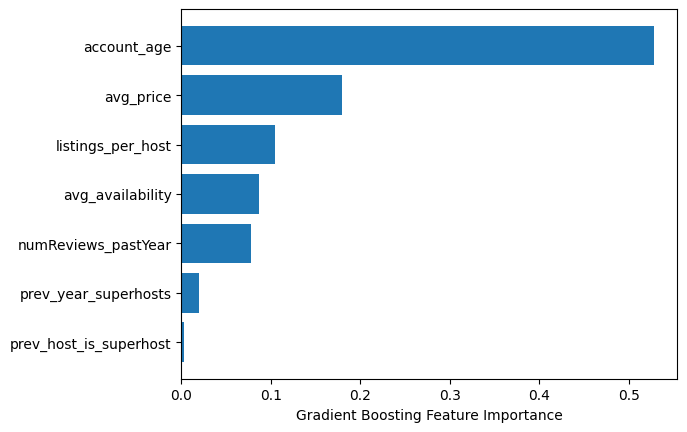

In [ ]:
import pandas as pd
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.ensemble import GradientBoostingClassifier
import matplotlib.pyplot as plt

# Load data and prepare predictors and target
# [Existing code for data loading and preprocessing]

# Gradient Boosting Model
gb_clf = GradientBoostingClassifier(n_estimators=250, learning_rate=0.05, random_state=42)
gb_clf.fit(X_train_scaled, y_train)

# Predict on training set and calculate accuracy
y_pred_train_gb = gb_clf.predict(X_train_scaled)
train_accuracy_gb = accuracy_score(y_train, y_pred_train_gb)

# Predict on validation set and calculate accuracy
y_pred_val_gb = gb_clf.predict(X_val_scaled)
val_accuracy_gb = accuracy_score(y_val, y_pred_val_gb)

# Confusion matrices for training and validation sets
conf_matrix_train_gb = confusion_matrix(y_train, y_pred_train_gb)
conf_matrix_val_gb = confusion_matrix(y_val, y_pred_val_gb)

print(f"Gradient Boosting - Accuracy for Training: {train_accuracy_gb}")
print(f"Gradient Boosting - Accuracy for Validation: {val_accuracy_gb}")

print("Gradient Boosting - Confusion Matrix for Training Set:")
print(conf_matrix_train_gb)

print("Gradient Boosting - Confusion Matrix for Validation Set:")
print(conf_matrix_val_gb)

# Feature Importance Plot
feature_importance = gb_clf.feature_importances_
sorted_idx = feature_importance.argsort()

# Using list comprehension to reorder predictors
sorted_predictors = [predictors[i] for i in sorted_idx]

plt.barh(sorted_predictors, feature_importance[sorted_idx])
plt.xlabel("Gradient Boosting Feature Importance")
plt.show()